## Penguin Classification with a Random Forest
**classify the species of penguins using a ML model**

In [ ]:
!pip install scikit-learn seaborn

## steps to train a machine learning model:

1. get data 
2. separate training and test data
3. clean data
4. data exploration
5. feature extraction
6. choose and train a model
7. optimize hyperparameters
8. evaluate the model

In [1]:
# 1. get data
import seaborn as sns

data = sns.load_dataset("penguins")
data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [3]:
# 2. separate training and test data
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)
train.shape, test.shape  # number of rows and cols

((275, 7), (69, 7))

In [9]:
# 3. clean data
train = train.dropna()  # remove rows with missing data
test = test.dropna()
train.isna().sum()  # .plot.bar()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

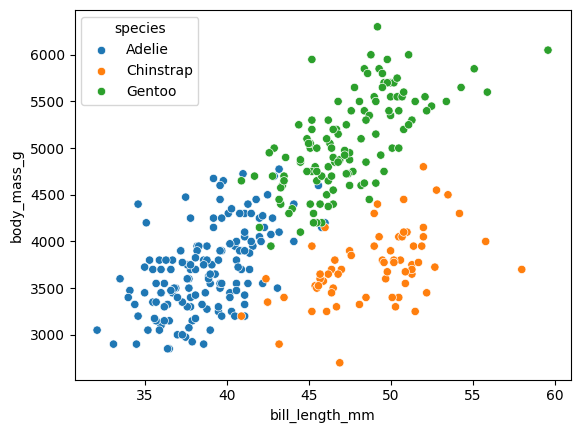

In [12]:
# 4. data exploration
data.describe()
sns.scatterplot(data=data, x="bill_length_mm",
                y="body_mass_g", hue="species")

In [16]:
# 5. feature extraction
#    (define X and y)
Xtrain = train[["bill_length_mm", "body_mass_g"]]
Xtest = test[["bill_length_mm", "body_mass_g"]]
ytrain = train["species"]
ytest = test["species"]
# Xtrain.head(3)

In [35]:
# 6. train a model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model = DecisionTreeClassifier(max_depth=4, random_state=7)
model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=7)
model.fit(Xtrain, ytrain)
round(model.score(Xtrain, ytrain), 2)  # accuracy

0.98

In [36]:
# 7. optimize
from sklearn.model_selection import cross_val_score

cross_val_score(model, Xtrain, ytrain, cv=5)  # splits 5 times

array([0.90740741, 0.92592593, 0.96226415, 0.90566038, 0.98113208])

In [37]:
# 8. evaluate the model on test data
(
    round(model.score(Xtrain, ytrain), 2),
    round(model.score(Xtest, ytest), 2)
)

(0.98, 0.92)